In [149]:
import numpy as np
from dotenv import load_dotenv, dotenv_values
from binance.client import Client
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
plt.style.use("seaborn-v0_8")


In [150]:
config = dotenv_values(".env")
client = Client(api_key=config['BINANCE_KEY'], api_secret=config['BINANCE_SECRET'])

timestamp = client._get_earliest_valid_timestamp(symbol='BTCUSDT', interval='1h')

In [151]:
def get_history(symbol, interval, start, end = None):
    bars = client.get_historical_klines(symbol, interval, start_str=start, end_str=end, limit=1000)
    df = pd.DataFrame(bars)
    df["Date"] = pd.to_datetime(df.iloc[:,0], unit='ms')
    df.columns = [
        'Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Clos time', 'Quote asset volume', 'Number of trades', 'Taker buy asset volume',
    'Taker buy quote asset volume', 'Ignore', 'Date'
    ]
    df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].copy()
    df.set_index('Date', inplace=True)  
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

In [152]:
df = get_history(symbol='BTCUSDT', interval='1h', start= timestamp)
    
data = df[['Close', 'Volume']].copy()
data

,Close,Volume
Date,,
2017-08-17 04:00:00,4308.830000,47.181009
2017-08-17 05:00:00,4315.320000,23.234916
2017-08-17 06:00:00,4324.350000,7.229691
2017-08-17 07:00:00,4349.990000,4.443249
2017-08-17 08:00:00,4360.690000,0.972807
...,...,...
2024-09-06 05:00:00,56491.010000,859.717210
2024-09-06 06:00:00,56430.010000,555.460990
2024-09-06 07:00:00,55804.290000,4110.124660


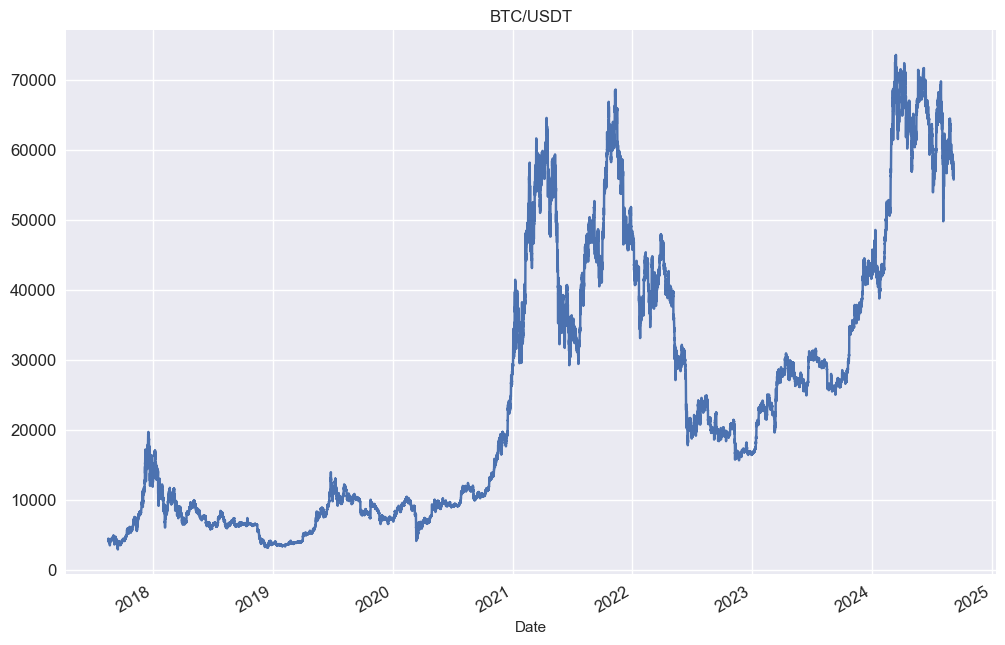

In [153]:
data.Close.plot(figsize=(12,8), title='BTC/USDT', fontsize=12)
plt.show()

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 61726 entries, 2017-08-17 04:00:00 to 2024-09-06 09:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   61726 non-null  float64
 1   Volume  61726 non-null  float64
dtypes: float64(2)
memory usage: 1.4 MB


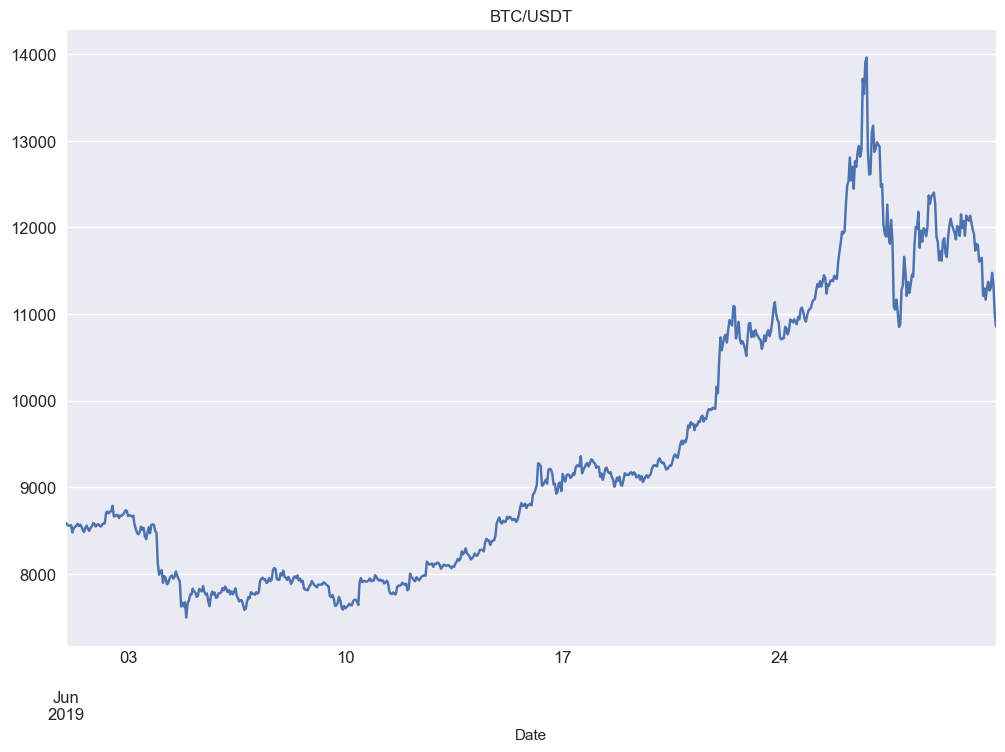

In [155]:
data.Close.loc['2019-06'].plot(figsize=(12,8), title='BTC/USDT', fontsize=12)
plt.show()

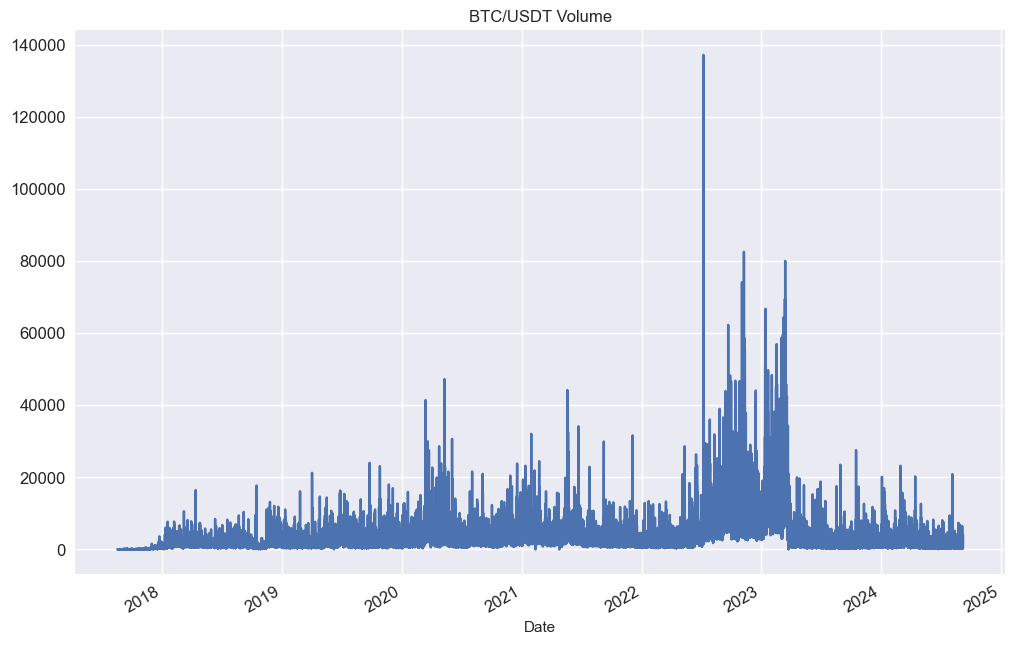

In [156]:
data.Volume.plot(figsize=(12,8), title='BTC/USDT Volume', fontsize=12)
plt.show()

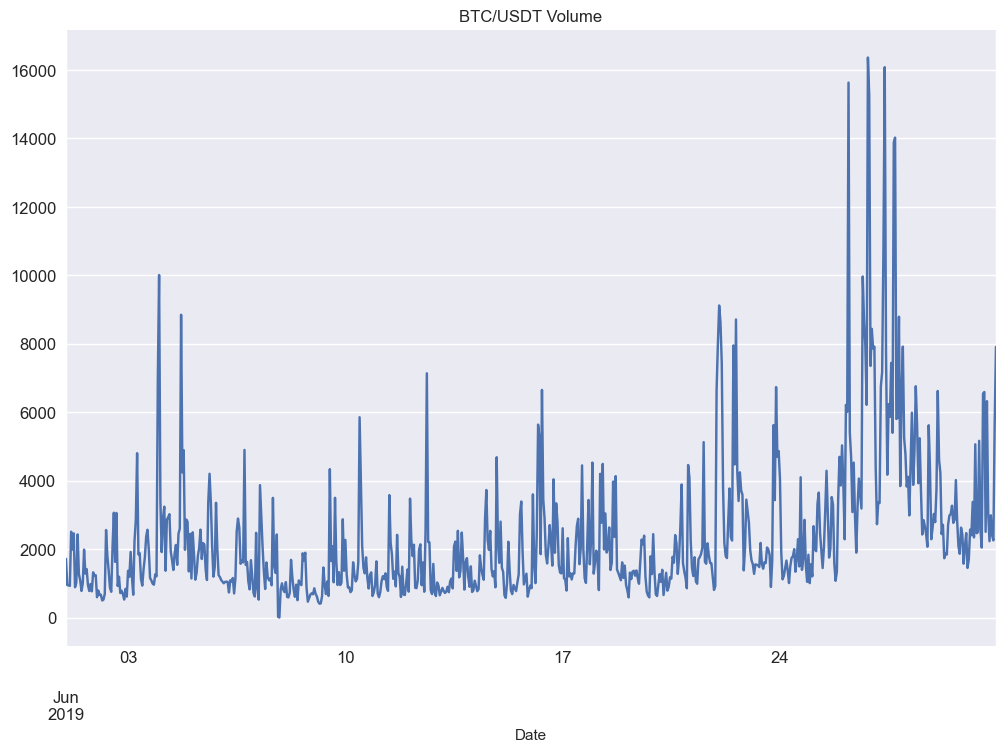

In [157]:
data.Volume.loc['2019-06'].plot(figsize=(12,8), title='BTC/USDT Volume', fontsize=12)
plt.show()

In [158]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))
data.describe()

,Close,Volume,returns
count,61726.000000,61726.000000,61725.000000
mean,24696.461279,2912.282222,0.000041
std,19234.727552,4177.437013,0.008310
min,2919.000000,0.000000,-0.201033
25%,8285.307500,915.804445,-0.002604
50%,19144.805000,1605.585275,0.000084
75%,38749.282500,3098.074439,0.002784
max,73577.350000,137207.188600,0.160280


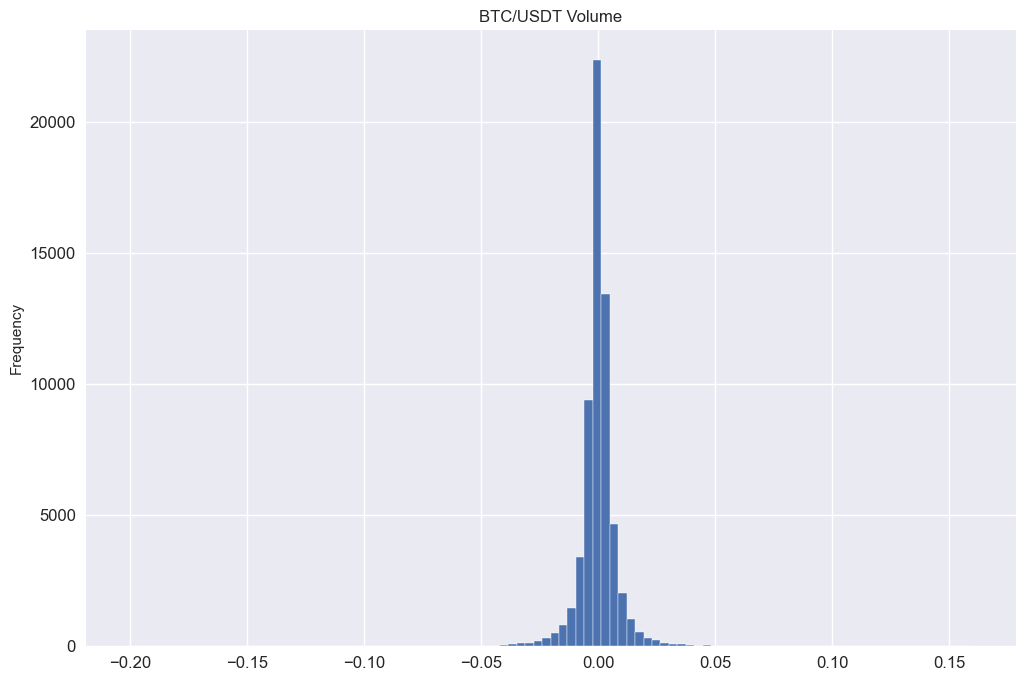

In [159]:
data.returns.plot(kind='hist', bins =100, figsize=(12,8), title='BTC/USDT Volume', fontsize=12)
plt.show()

In [160]:
data.returns.nlargest(20)

Date
2020-03-13 02:00:00   0.160280
2017-09-15 12:00:00   0.131731
2020-03-15 21:00:00   0.129546
2017-09-15 14:00:00   0.117777
2021-01-29 08:00:00   0.116145
2017-09-05 02:00:00   0.113257
2018-01-17 16:00:00   0.108790
2018-04-12 11:00:00   0.103325
2018-10-15 06:00:00   0.100727
2019-07-18 14:00:00   0.089576
2017-11-12 07:00:00   0.087917
2017-12-24 03:00:00   0.087599
2021-02-08 12:00:00   0.086478
2019-10-26 01:00:00   0.086085
2018-02-06 09:00:00   0.081471
2020-03-23 12:00:00   0.079044
2020-03-13 19:00:00   0.078244
2019-10-25 15:00:00   0.074647
2018-01-17 19:00:00   0.073886
2019-04-02 04:00:00   0.073527
Name: returns, dtype: float64

In [161]:
data.returns.nsmallest(20)

Date
2020-03-12 10:00:00   -0.201033
2020-03-12 23:00:00   -0.189707
2020-03-13 01:00:00   -0.119449
2017-12-28 02:00:00   -0.108097
2017-12-22 13:00:00   -0.107858
2017-09-05 01:00:00   -0.099818
2017-08-22 04:00:00   -0.098295
2020-03-15 22:00:00   -0.095180
2021-05-19 12:00:00   -0.093810
2019-09-24 18:00:00   -0.093730
2020-05-10 00:00:00   -0.091686
2017-12-22 23:00:00   -0.091257
2018-01-11 03:00:00   -0.090042
2021-05-21 14:00:00   -0.083006
2018-01-16 09:00:00   -0.082607
2019-06-26 20:00:00   -0.081136
2018-02-06 01:00:00   -0.080017
2019-02-24 14:00:00   -0.079872
2020-03-16 10:00:00   -0.079781
2018-01-08 14:00:00   -0.079753
Name: returns, dtype: float64

In [162]:
data.Close/ data.Close.iloc[0]

Date
2017-08-17 04:00:00    1.000000
2017-08-17 05:00:00    1.001506
2017-08-17 06:00:00    1.003602
2017-08-17 07:00:00    1.009552
2017-08-17 08:00:00    1.012036
                         ...   
2024-09-06 05:00:00   13.110522
2024-09-06 06:00:00   13.096365
2024-09-06 07:00:00   12.951147
2024-09-06 08:00:00   12.946208
2024-09-06 09:00:00   12.940868
Name: Close, Length: 61726, dtype: float64

In [163]:
mu = data.returns.mean()
mu

np.float64(4.14806052799667e-05)

In [164]:
std = data.returns.std()
std

np.float64(0.008309591581604391)

In [165]:
number_of_periods = 24 * 365.25
number_of_periods

8766.0

In [166]:
ann_mean = mu * number_of_periods
ann_mean

np.float64(0.3636189858841881)

In [167]:
ann_std = std * np.sqrt(number_of_periods)
ann_std

np.float64(0.778001459645428)

In [168]:
cagr = np.exp(ann_mean) -1
cagr

np.float64(0.43852601101195154)

In [169]:
sharpe = ann_mean / ann_std
sharpe

np.float64(0.46737571167270875)

In [197]:
data.dropna(inplace=True)
data['creturns'] = data['returns'].cumsum().apply(np.exp)
data['vol_ch'] = np.log(data['Volume'].div(data['Volume'].shift(1)))

data.loc[data.vol_ch > 3, 'vol_ch'] = np.nan
data.loc[data.vol_ch < -3, 'vol_ch'] = np.nan

In [171]:
data['vol_ch'].nlargest(20)

Date
2022-03-27 20:00:00   2.949728
2017-08-20 11:00:00   2.904046
2017-10-12 00:00:00   2.884007
2017-12-04 07:00:00   2.851238
2019-07-27 10:00:00   2.808519
2017-08-20 15:00:00   2.779948
2022-07-08 14:00:00   2.674620
2019-12-16 18:00:00   2.658757
2023-10-16 13:00:00   2.634433
2017-08-20 05:00:00   2.585916
2019-09-06 17:00:00   2.579215
2023-09-12 03:00:00   2.578235
2018-04-12 11:00:00   2.562466
2020-06-10 18:00:00   2.537417
2018-10-15 05:00:00   2.525149
2019-01-19 10:00:00   2.512394
2023-10-16 05:00:00   2.509490
2019-07-28 22:00:00   2.490934
2019-10-13 20:00:00   2.487578
2017-09-08 13:00:00   2.485423
Name: vol_ch, dtype: float64

<Axes: title={'center': 'BTC/USDT Volume Change Hist'}, ylabel='Frequency'>

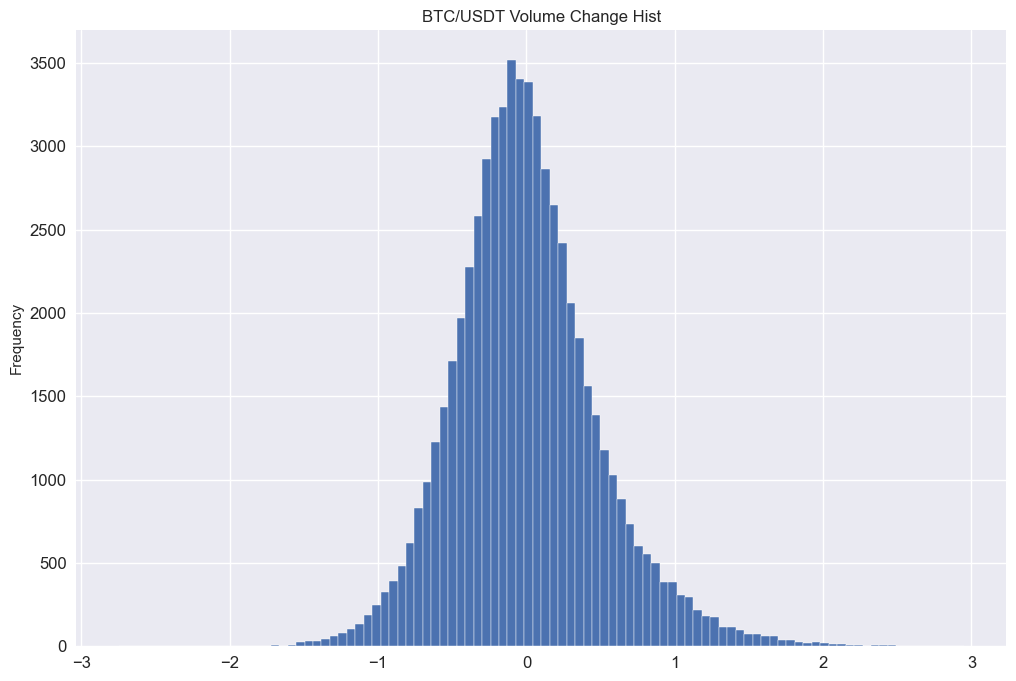

In [172]:
data.vol_ch.plot(kind='hist', bins=100, figsize=(12,8), title='BTC/USDT Volume Change Hist', fontsize=12)

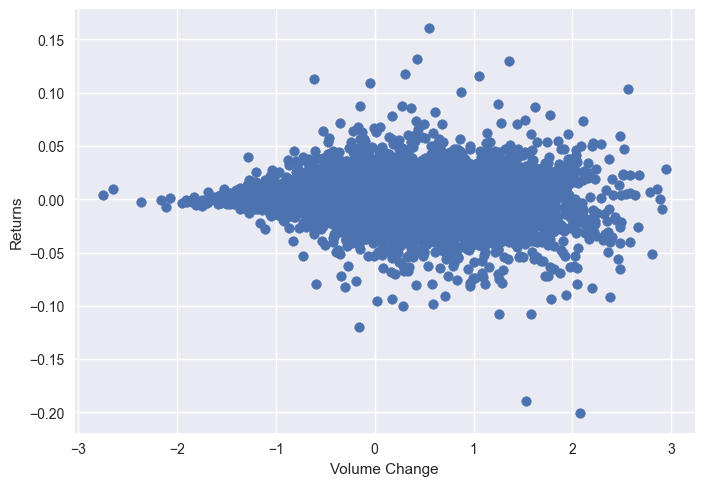

In [173]:
plt.scatter(x=data.vol_ch, y = data.returns)
plt.xlabel("Volume Change")
plt.ylabel("Returns")
plt.show()

In [174]:
pd.qcut(data.returns, q=10)

Date
2017-08-17 05:00:00      (0.00099, 0.00207]
2017-08-17 06:00:00       (0.00207, 0.0037]
2017-08-17 07:00:00       (0.0037, 0.00689]
2017-08-17 08:00:00       (0.00207, 0.0037]
2017-08-17 09:00:00         (0.00689, 0.16]
                               ...         
2024-09-06 05:00:00    (-0.00189, -0.00084]
2024-09-06 06:00:00    (-0.00189, -0.00084]
2024-09-06 07:00:00      (-0.202, -0.00673]
2024-09-06 08:00:00    (-0.00084, 8.37e-05]
2024-09-06 09:00:00    (-0.00084, 8.37e-05]
Name: returns, Length: 61725, dtype: category
Categories (10, interval[float64, right]): [(-0.202, -0.00673] < (-0.00673, -0.00347] < (-0.00347, -0.00189] < (-0.00189, -0.00084] ... (0.00099, 0.00207] < (0.00207, 0.0037] < (0.0037, 0.00689] < (0.00689, 0.16]]

In [175]:
data['ret_cat'] = pd.qcut(data.returns, q=10, labels = [-5, -4, -3, -2, -1, 1, 2,3,4,5])

In [176]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat
Date,,,,,,
2017-08-17 05:00:00,4315.320000,23.234916,0.001505,1.001506,NaN,2
2017-08-17 06:00:00,4324.350000,7.229691,0.002090,1.003602,-1.167460,3
2017-08-17 07:00:00,4349.990000,4.443249,0.005912,1.009552,-0.486810,4
2017-08-17 08:00:00,4360.690000,0.972807,0.002457,1.012036,-1.518955,3
2017-08-17 09:00:00,4444.000000,10.763623,0.018925,1.031370,2.403742,5
...,...,...,...,...,...,...
2024-09-06 05:00:00,56491.010000,859.717210,-0.001833,13.110522,0.719807,-2
2024-09-06 06:00:00,56430.010000,555.460990,-0.001080,13.096365,-0.436805,-2
2024-09-06 07:00:00,55804.290000,4110.124660,-0.011150,12.951147,2.001410,-5


In [177]:
data.ret_cat.value_counts()

ret_cat
-5    6173
-3    6173
 5    6173
-1    6173
 3    6173
-4    6172
 1    6172
-2    6172
 2    6172
 4    6172
Name: count, dtype: int64

In [178]:
data['vol_cat'] = pd.qcut(data.Volume, q=10, labels = [-5, -4, -3, -2, -1, 1, 2,3,4,5])

In [179]:
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat
Date,,,,,,,
2017-08-17 05:00:00,4315.320000,23.234916,0.001505,1.001506,NaN,2,-5
2017-08-17 06:00:00,4324.350000,7.229691,0.002090,1.003602,-1.167460,3,-5
2017-08-17 07:00:00,4349.990000,4.443249,0.005912,1.009552,-0.486810,4,-5
2017-08-17 08:00:00,4360.690000,0.972807,0.002457,1.012036,-1.518955,3,-5
2017-08-17 09:00:00,4444.000000,10.763623,0.018925,1.031370,2.403742,5,-5
...,...,...,...,...,...,...,...
2024-09-06 05:00:00,56491.010000,859.717210,-0.001833,13.110522,0.719807,-2,-3
2024-09-06 06:00:00,56430.010000,555.460990,-0.001080,13.096365,-0.436805,-2,-4
2024-09-06 07:00:00,55804.290000,4110.124660,-0.011150,12.951147,2.001410,-5,4


In [180]:
matrix = pd.crosstab(data.vol_cat, data.ret_cat)
matrix

ret_cat,-5,-4,-3,-2,-1,1,2,3,4,5
vol_cat,,,,,,,,,,
-5,590,381,430,673,932,932,622,439,446,728
-4,166,341,693,875,1006,1014,983,684,287,123
-3,146,461,765,857,785,871,818,788,506,176
-2,210,641,788,771,708,675,778,781,611,209
-1,306,749,769,672,561,607,665,788,729,327
1,474,812,709,577,520,478,585,687,868,462
2,718,901,628,497,402,396,430,663,845,692
3,1093,786,484,361,368,315,382,490,817,1077
4,1361,527,389,415,461,437,380,374,526,1302


In [181]:
import seaborn as sns

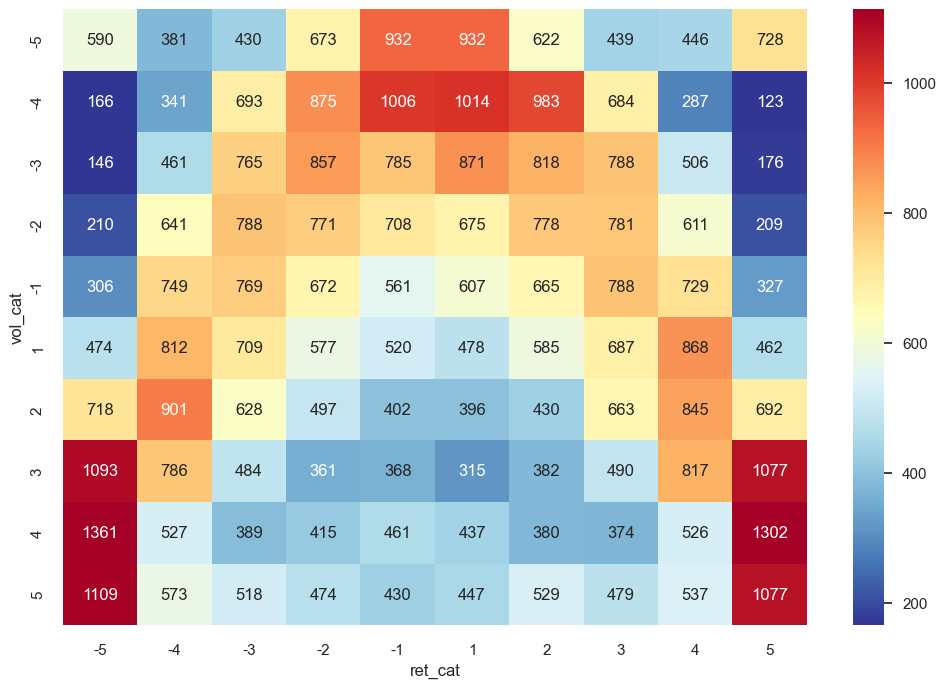

In [182]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, fmt=".0f", cmap='RdYlBu_r',  robust=True)
plt.show()

In [183]:
data.vol_ch.corr(data.returns)

np.float64(-0.054884414067319885)

In [184]:
matrix = pd.crosstab(data.vol_cat.shift(), data.ret_cat.shift(), values=data.returns, aggfunc = "mean")
matrix

ret_cat,-5,-4,-3,-2,-1,1,2,3,4,5
vol_cat,,,,,,,,,,
-5,0.001813,0.000920,0.000110,0.000331,-0.000013,-0.000248,-0.000217,-0.000101,0.000015,-0.001268
-4,-0.000013,-0.000024,0.000134,-0.000025,0.000088,0.000056,0.000081,0.000251,-0.000347,-0.001858
-3,0.000913,0.000224,0.000319,0.000090,-0.000082,0.000268,-0.000017,-0.000376,-0.000209,-0.002038
-2,0.000836,0.000620,-0.000058,0.000192,-0.000153,0.000007,-0.000114,-0.000126,-0.000247,-0.000593
-1,-0.000024,0.000076,-0.000040,-0.000244,0.000275,0.000437,-0.000360,-0.000273,-0.000153,0.000545
1,0.000561,0.000019,-0.000173,0.000307,-0.000076,-0.000053,-0.000258,-0.000293,-0.000273,-0.000503
2,0.001018,0.000066,0.000387,-0.000539,0.000145,-0.000337,-0.000247,0.000115,-0.000473,-0.000244
3,0.000506,0.000564,-0.000222,0.000343,-0.000283,-0.000279,-0.000384,-0.000125,-0.000074,0.000401
4,0.000451,-0.000728,0.000167,0.000449,-0.000528,-0.000082,-0.000206,0.000537,0.000373,0.000064


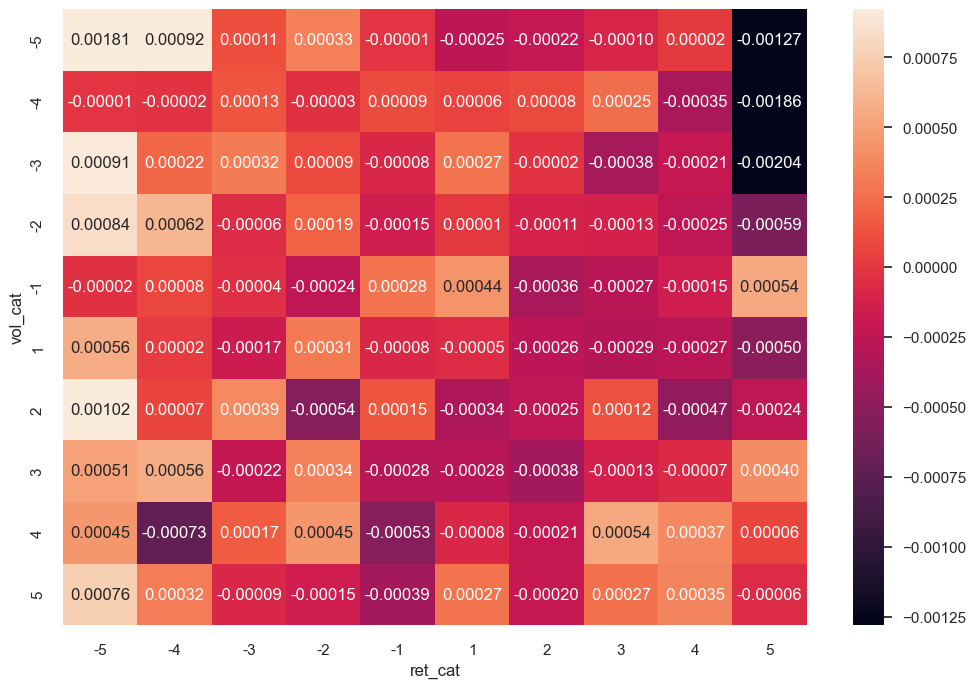

In [185]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
sns.heatmap(matrix, annot=True, robust=True, fmt='.5f')
plt.show()

In [186]:
data['position'] = 1

In [187]:
return_thresh = np.percentile(data.returns.dropna(), 90)
return_thresh

np.float64(0.006885925895694683)

In [188]:
cond1 = data.returns >= return_thresh
cond1

Date
2017-08-17 05:00:00    False
2017-08-17 06:00:00    False
2017-08-17 07:00:00    False
2017-08-17 08:00:00    False
2017-08-17 09:00:00     True
                       ...  
2024-09-06 05:00:00    False
2024-09-06 06:00:00    False
2024-09-06 07:00:00    False
2024-09-06 08:00:00    False
2024-09-06 09:00:00    False
Name: returns, Length: 61725, dtype: bool

In [189]:
volume_thresh = np.percentile(data.vol_ch.dropna(), [5,20])
volume_thresh

array([-0.73387808, -0.37813341])

In [190]:
cond2 = data.vol_ch.between(volume_thresh[0], volume_thresh[1])
cond2

Date
2017-08-17 05:00:00    False
2017-08-17 06:00:00    False
2017-08-17 07:00:00     True
2017-08-17 08:00:00    False
2017-08-17 09:00:00    False
                       ...  
2024-09-06 05:00:00    False
2024-09-06 06:00:00     True
2024-09-06 07:00:00    False
2024-09-06 08:00:00    False
2024-09-06 09:00:00    False
Name: vol_ch, Length: 61725, dtype: bool

In [191]:
data.loc[cond1 & cond2, 'position'] = 0
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position
Date,,,,,,,,
2017-08-17 05:00:00,4315.320000,23.234916,0.001505,1.001506,NaN,2,-5,1
2017-08-17 06:00:00,4324.350000,7.229691,0.002090,1.003602,-1.167460,3,-5,1
2017-08-17 07:00:00,4349.990000,4.443249,0.005912,1.009552,-0.486810,4,-5,1
2017-08-17 08:00:00,4360.690000,0.972807,0.002457,1.012036,-1.518955,3,-5,1
2017-08-17 09:00:00,4444.000000,10.763623,0.018925,1.031370,2.403742,5,-5,1
...,...,...,...,...,...,...,...,...
2024-09-06 05:00:00,56491.010000,859.717210,-0.001833,13.110522,0.719807,-2,-3,1
2024-09-06 06:00:00,56430.010000,555.460990,-0.001080,13.096365,-0.436805,-2,-4,1
2024-09-06 07:00:00,55804.290000,4110.124660,-0.011150,12.951147,2.001410,-5,4,1


In [192]:
data.position.value_counts()

position
1    61132
0      593
Name: count, dtype: int64

In [193]:
data['strategy_returns'] = data['returns'] * data['position'].shift(1)
data

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position,strategy_returns
Date,,,,,,,,,
2017-08-17 05:00:00,4315.320000,23.234916,0.001505,1.001506,NaN,2,-5,1,NaN
2017-08-17 06:00:00,4324.350000,7.229691,0.002090,1.003602,-1.167460,3,-5,1,0.002090
2017-08-17 07:00:00,4349.990000,4.443249,0.005912,1.009552,-0.486810,4,-5,1,0.005912
2017-08-17 08:00:00,4360.690000,0.972807,0.002457,1.012036,-1.518955,3,-5,1,0.002457
2017-08-17 09:00:00,4444.000000,10.763623,0.018925,1.031370,2.403742,5,-5,1,0.018925
...,...,...,...,...,...,...,...,...,...
2024-09-06 05:00:00,56491.010000,859.717210,-0.001833,13.110522,0.719807,-2,-3,1,-0.001833
2024-09-06 06:00:00,56430.010000,555.460990,-0.001080,13.096365,-0.436805,-2,-4,1,-0.001080
2024-09-06 07:00:00,55804.290000,4110.124660,-0.011150,12.951147,2.001410,-5,4,1,-0.011150


In [194]:
data['cumm_strategy'] = data['strategy_returns'].cumsum().apply(np.exp)

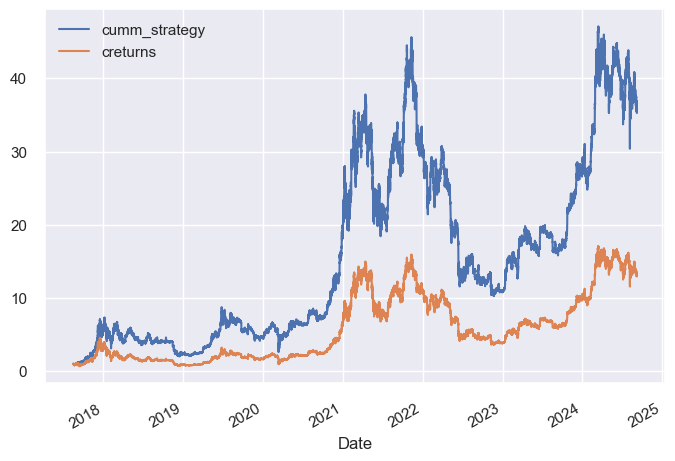

In [195]:
data[['cumm_strategy', 'creturns']].plot()
plt.show()

In [196]:
test = get_history(symbol='BTCUSDT', interval='1h', start = '2024-07-01')
    
test = test[['Close', 'Volume']].copy()
test

,Close,Volume
Date,,
2024-07-01 00:00:00,62931.990000,987.126450
2024-07-01 01:00:00,63640.820000,2570.401710
2024-07-01 02:00:00,63435.860000,2037.332310
2024-07-01 03:00:00,63437.690000,1264.462810
2024-07-01 04:00:00,63279.790000,517.152800
...,...,...
2024-09-06 05:00:00,56491.010000,859.717210
2024-09-06 06:00:00,56430.010000,555.460990
2024-09-06 07:00:00,55804.290000,4110.124660


In [201]:
test.dropna(inplace=True)
test["returns"] = np.log(test.Close.div(test.Close.shift(1)))
test['creturns'] = test['returns'].cumsum().apply(np.exp)
test['vol_ch'] = np.log(test['Volume'].div(test['Volume'].shift(1)))

test.loc[test.vol_ch > 3, 'vol_ch'] = np.nan
test.loc[test.vol_ch < -3, 'vol_ch'] = np.nan

test['position'] = 1

cond1 = test.returns >= np.percentile(test.returns.dropna(), 90)
volume_thresh = np.percentile(test.vol_ch.dropna(), [5,20])
cond2 = test.vol_ch.between(volume_thresh[0], volume_thresh[1])

test.loc[cond1 & cond2, 'position'] = 0

test['strategy_returns'] = test['returns'] * test['position'].shift(1)
test['cumm_strategy'] = test['strategy_returns'].cumsum().apply(np.exp)

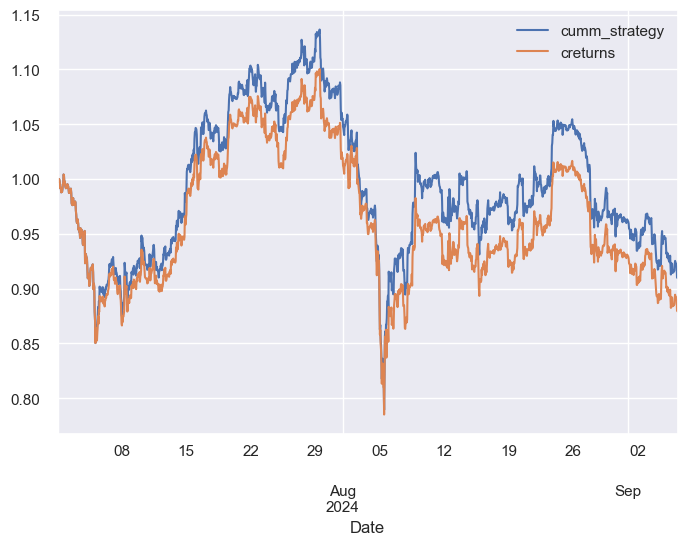

In [203]:
test[['cumm_strategy', 'creturns']].plot()
plt.show()

In [205]:
data['trades'] = data.position.diff().fillna(0).abs()
data.trades.value_counts()

trades
0.000000    60537
1.000000     1166
Name: count, dtype: int64

In [206]:
comissions = 0.00075
other = 0.0001
ptc = np.log(1-comissions) + np.log(1-other)
ptc

np.float64(-0.0008502863910375247)

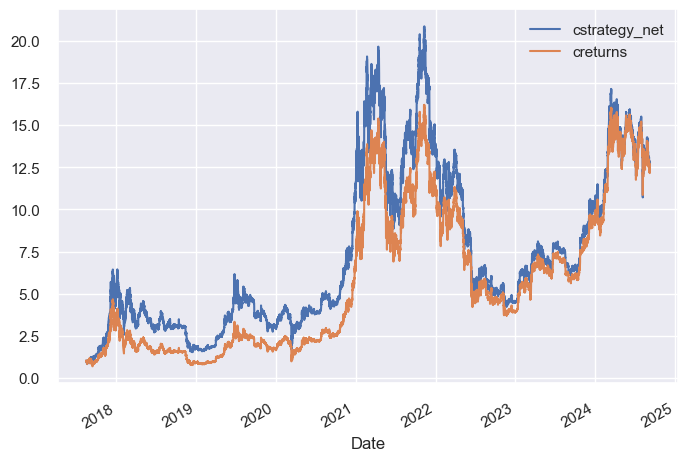

In [210]:
data['strategy_net'] = data.strategy_returns + data.trades * ptc
data['cstrategy_net'] =  data.strategy_net.cumsum().apply(np.exp)
data[['cstrategy_net', 'creturns']].plot()
plt.show()